# ADP 26회 실기 문제

# 머신러닝 - 데이터 설명
- 데이터 설명
    - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
    - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
    - Description: Product (item) name. Nominal.    
    - Quantity: The quantities of each product (item) per transaction. Numeric.     
    - InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
    - UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
    - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
    - Country: Country name. Nominal, the name of the country where each customer resides.  
    
- 출처 : - https://archive.ics.uci.edu/ml/index.phpm
- 데이터url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem1.csv

In [1]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem1.csv',encoding='cp949')
def resume(df):
    print(df.shape)
    tmp = pd.DataFrame()
    tmp['dtypes'] = df.dtypes
    tmp['결측치'] = df.isna().sum()
    tmp['유일값'] = df.nunique()
    tmp['첫번째'] = df.iloc[0,:]
    tmp['두번째'] = df.iloc[1,:]
    return tmp
resume(df)

(35801, 8)


,dtypes,결측치,유일값,첫번째,두번째
InvoiceNo,object,0,1846,563808,561645
StockCode,object,0,2668,22432,23166
Description,object,0,2763,WATERING CAN PINK BUNNY,MEDIUM CERAMIC TOP STORAGE JAR
Quantity,float64,25,124,6.0,12.0
InvoiceDate,object,0,1827,8/19/2011 11:46,7/28/2011 15:16
UnitPrice,float64,97,162,1.95,1.25
CustomerID,float64,0,289,12626.0,14911.0
Country,object,0,8,Germany,EIRE


## 문제1.1 
결측치를 확인 하고, 결측치 제거 또는 대치하고 방법에 대해 설명하라

## 문제1.2 
이상치를 제거하는 방법을 설명하고, 이상치 제거 전 후 결과에 대해 통계적인 방법을 포함하여 설명할 것

## 문제1.3 
각 StockCode을 기준으로 파생변수들을 만들고 제품들의 특성에 따른 군집 생성을 위한 전처리를 수행하라. 

## 문제 2.1 
Kmeans , DBSCAN 방법 중 하나를 선택하여 군집분석을 시행하고 각 군집별 특성을 분석하라

## 문제 2.2 
각 군집 별 대표 추천 상품을 도출할 것

## 문제 2.3 
CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

# 통계

## 문제 3
어느 제조업체의 제품 불량률을 조사하려고 한다. 이 회사의 제품 불량률이 실제로는 90%라고 알려져 있다.     
이를 표본 조사로 추정하고자 합니다. 추정된 불량률의 추정오차한계가 5% 이내가 되도록 하려면, 어느 정도의 표본 크기가 필요한지 계산하라.

In [2]:
import numpy as np
# 입력 값
p = 0.9  # 모집단의 비율 (불량률 90%)
me = 0.05  # 허용 가능한 오차한계 (5%)
z = 1.96  # 95% 신뢰수준에 해당하는 표준정규분포 값

# 표본 크기 계산
n = (z**2 * p * (1 - p)) / (me**2)
n = np.ceil(n)  # 정수로 올림

print(f"필요한 표본 크기: {n}")

필요한 표본 크기: 139.0


## 문제 설명 (4번)
![image](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem2.png)

In [3]:
df = pd.DataFrame([12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38],index= [f'{i}월' for i in range(1,10)],columns=['USD/oz']).T
df

,1월,2월,3월,4월,5월,6월,7월,8월,9월
USD/oz,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


## 문제 4.1 
은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

In [4]:
df = pd.DataFrame([12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38],index= [f'{i}월' for i in range(1,10)],columns=['USD/oz']).T
df = df.T.reset_index()
df['index'] = df['index'].str.replace('월','')
df['index'] = pd.to_datetime(df['index'], format='%m').dt.month
df = df.set_index('index')
df

,USD/oz
index,
1,12.14
2,42.60
3,34.40
4,35.29
5,30.96
6,57.12
7,37.84
8,42.49
9,31.38


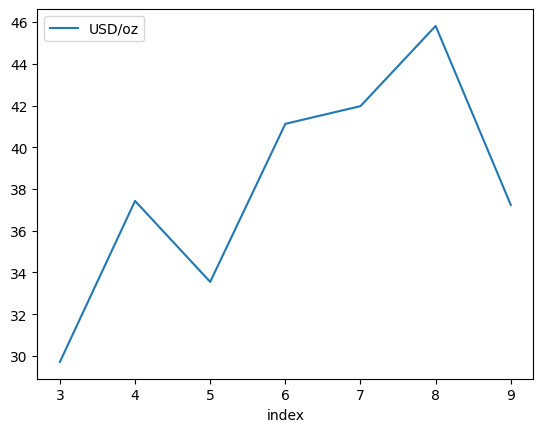

In [5]:
df.rolling(3).mean().plot();

## 문제 4.2
1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

In [6]:
np.round((df.loc[9,'USD/oz']/df.loc[1,'USD/oz']-1)*100,2)

158.48

## 문제설명 (5번)
<img src="https://github.com/Datamanim/datarepo/blob/main/adp/26/problem3.png?raw=true" width="300" height="300">

위 표는 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다. 자치구별 지지율이 같은지에 대해서 검정하라

## 문제 5.1 
연구가설과 귀무가설을 설정하라

In [4]:
H0 = '자치구별 지지율이 같다'
H1 = '자치구별 지지율이 같지않다'
print(f"귀무가설은 '{H0}'이고,\n연구가설은 '{H1}'이다")

귀무가설은 '자치구별 지지율이 같다'이고,
연구가설은 '자치구별 지지율이 같지않다'이다


## 문제 5.2 
검정통계량을 구하고 결론을 내라

In [5]:
import pandas as pd
df = pd.DataFrame([[176,193,159],
              [124,107,141]],
            index=['찬성','반대'],
            columns=['A','B','C'])
from scipy.stats import chi2_contingency
_,p_val,_,_ = chi2_contingency(df)
if p_val<0.05:print(f"pvalue:{p_val:.3f}로 귀무가설을 기각하여 {H1}")
else:print(f"pvalue:{p_val:.3f}로 귀무가설을 채택하여 {H0}")

pvalue:0.019로 귀무가설을 기각하여 자치구별 지지율이 같지않다


## 문제설명 (6번)
A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 확인하려한다.
- 데이터 url :https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv')

## 문제 6.2 
검정 통계량을 구하고 가설 검정을 수행하라

In [7]:
'''
서로다른 두 집단의 평균차이를 구하는 문제로 샘플 30개 이하이므로 정규성검정이후
모수검정시 독립표본t검정으로, 비모수 검정 독립표본이므로 mannwhitneyu로 풀이한다
'''
H0 = '남녀학생의 평균 혈압에 차이가 없다'
H1 = '남녀학생의 평균 혈압에 차이가 있다'
con_m = df['gender']=='male'
con_f = df['gender']=='female'
male = df.loc[con_m,'pressure']
female = df.loc[con_f,'pressure']
from scipy.stats import shapiro
print(shapiro(male.values).pvalue)
print(shapiro(female.values).pvalue)

0.038415980516041
0.05908637914715314


남성의 경우, pvalue가 0.05이하이므로 정규성을 만족한다고 보기 어렵다.
따라서 비모수검정으로 풀이

In [11]:
from scipy.stats import mannwhitneyu
u_stat, p_val = mannwhitneyu(male, female)
if p_val<0.05:print(f'pvalue가 {p_val:.6f}으로 {H1}')
else:print(f'pvalue가 {p_val:.6f}으로 {H0}')

pvalue가 0.148758으로 남녀학생의 평균 혈압에 차이가 없다


## 문제 6.3 
6.2의 검정 통계량 값을 바탕으로 신뢰수준 95%하에서 신뢰구간을 설정하라

In [14]:
import numpy as np
np.random.choice(male, size=len(male), replace=True)

array([ 97.1, 107. ,  91.2, 107. , 100.8,  83.9,  91.2,  91.2,  97.1,
        83.9,  84.5, 106.2, 101.2, 100.8,  97.1, 107. ])

In [12]:
# Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(male, female)

# 부트스트랩 신뢰구간 계산
def bootstrap_mannwhitneyu(data1, data2, alpha=0.05, n_bootstraps=10000):
    stats = []
    for _ in range(n_bootstraps):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        stats.append(mannwhitneyu(sample1, sample2)[0])
    
    stats = np.sort(stats)
    lower = stats[int(alpha/2 * n_bootstraps)]
    upper = stats[int((1 - alpha/2) * n_bootstraps)]
    
    return lower, statistic, upper

# 95% 신뢰구간 계산
lower, statistic, upper = bootstrap_mannwhitneyu(male, female, alpha=0.05)
print(f"Mann-Whitney U Test Statistic: {statistic:.2f}")
print(f"95% Confidence Interval: [{lower:.2f}, {upper:.2f}]")


Mann-Whitney U Test Statistic: 98.00
95% Confidence Interval: [61.00, 131.00]


## 문제설명 (7번)
height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라      
A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.         
이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다.     

- 데이터 url :https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv

## 문제 7.1
아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.    
- 베이지안 회귀   
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(improper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

In [35]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv')
df.head(1)

,height,weight,waistline
0,174.396,72.102,79.3787


In [28]:
x1 = df['height']
x2 = df['waistline']
y = df['weight']

In [ ]:
import pymc as pm
with pm.Model() as model:
    beta1 = pm.Flat('beta1') # Flat : 회귀계수의 사전분포 정의 (부적절한 균일분포)
    beta2 = pm.Flat('beta2')
    alpha = pm.Flat('alpha')

    shape = 0.005
    scaling = 0.005
    sigma = pm.InverseGamma('sigma', alpha=shape, beta=scaling) # 오차항의 분산의 사전분포 정의 (역감마분포)
    y_test = alpha + beta1*x1.values + beta2*x2.values 
    likelihood = pm.Normal('y', mu=y_test, sigma=sigma, observed=y)

    # inference
    start = pm.find_MAP()
    step = pm.NUTS() # NUTS MCMC 샘플링 알고리즘
    # Perform MCMC sampling with burn-in of 1000 and 10000 iterations(MCMC) -> 소요 시간 길어 100,100번으로 진행함.
    trace = pm.sample(draws=1000, tune=10000, start=start, progressbar=True, random_seed=1234)

Output()

C:\Users\masta\AppData\Local\Temp\ipykernel_19600\4571398.py:17: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(draws=1000, tune=10000, start=start, progressbar=True, random_seed=1234)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, beta2, alpha, sigma]


Output()

In [ ]:
sm = pm.summary(trace)
sm

## 문제 7.2
위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라

In [ ]:
# 새로운 데이터 생성
alpha = sm.loc['alpha','mean']
beta1 = sm.loc['beta1','mean']
beta2 = sm.loc['beta2','mean']

# 예측값 계산
mu_pred = alpha + beta1 * 180 + beta2 * 85

print(f'예측 몸무게: {round(mu_pred, 2)} kg')